In [1]:
import sys
sys.path.append("../")

from pathlib import Path
from pyosim import Analogs3dOsim
import pandas as pd
import numpy as np
import altair as alt
alt.data_transformers.enable("json")

DataTransformerRegistry.enable('json')

In [2]:
DATA_PATH = Path("/home/romain/Downloads/results/mars/1_inverse_kinematic")

data = pd.DataFrame()
for ifile in DATA_PATH.glob("*.mot"):
    d = Analogs3dOsim().from_mot(ifile).time_normalization(np.linspace(0, 100, 100))

    d = pd.DataFrame(d.squeeze().T, columns=d.get_2d_labels())
    d.insert(0, column="trial", value=ifile.stem)

    data = pd.concat([data, d.reset_index()])

In [3]:
data.head()

,index,trial,thorax_tilt,thorax_list,thorax_rotation,thorax_tx,thorax_ty,thorax_tz,sternoclavicular_r1,sternoclavicular_r2,...,elbow_flexion,pro_sup,hand_r_Add,hand_r_Flex,box_rotX,box_rotY,box_rotZ,box_transX,box_transY,box_transZ
0,0,wu_MarSF6H6_1,-13.632767,-8.155043,22.494201,-0.517693,0.536162,0.166857,-52.188458,25.159301,...,48.306986,-12.556793,-32.525522,39.348152,-90.173469,-20.817068,-181.110737,0.133659,0.040669,0.837888
1,1,wu_MarSF6H6_1,-13.893627,-8.315431,23.043649,-0.516821,0.536740,0.165662,-52.311928,25.246857,...,48.911330,-8.118552,-32.146815,42.184304,-90.258218,-20.898153,-181.016448,0.133168,0.040250,0.837912
2,2,wu_MarSF6H6_1,-14.114331,-8.458976,23.246792,-0.518214,0.537132,0.165692,-52.185166,25.263130,...,48.985814,-4.271470,-31.670072,44.183249,-90.266818,-20.900543,-181.017610,0.133324,0.040106,0.837940
3,3,wu_MarSF6H6_1,-14.375873,-8.570330,23.094432,-0.521373,0.537413,0.166743,-51.965567,25.308784,...,48.885915,-0.727831,-30.966849,45.732453,-90.326767,-20.902002,-180.928143,0.135289,0.041072,0.837918
4,4,wu_MarSF6H6_1,-14.414442,-8.532948,22.752335,-0.527107,0.538336,0.168946,-51.199671,25.457976,...,48.653908,3.098155,-30.426506,47.304160,-90.335811,-20.880583,-180.909908,0.139301,0.042887,0.837925


In [9]:
data._get_numeric_data()

,index,thorax_tilt,thorax_list,thorax_rotation,thorax_tx,thorax_ty,thorax_tz,sternoclavicular_r1,sternoclavicular_r2,sternoclavicular_r3,...,elbow_flexion,pro_sup,hand_r_Add,hand_r_Flex,box_rotX,box_rotY,box_rotZ,box_transX,box_transY,box_transZ
0,0,-13.632767,-8.155043,22.494201,-0.517693,0.536162,0.166857,-52.188458,25.159301,0.0,...,48.306986,-12.556793,-32.525522,39.348152,-90.173469,-20.817068,-181.110737,0.133659,0.040669,0.837888
1,1,-13.893627,-8.315431,23.043649,-0.516821,0.536740,0.165662,-52.311928,25.246857,0.0,...,48.911330,-8.118552,-32.146815,42.184304,-90.258218,-20.898153,-181.016448,0.133168,0.040250,0.837912
2,2,-14.114331,-8.458976,23.246792,-0.518214,0.537132,0.165692,-52.185166,25.263130,0.0,...,48.985814,-4.271470,-31.670072,44.183249,-90.266818,-20.900543,-181.017610,0.133324,0.040106,0.837940
3,3,-14.375873,-8.570330,23.094432,-0.521373,0.537413,0.166743,-51.965567,25.308784,0.0,...,48.885915,-0.727831,-30.966849,45.732453,-90.326767,-20.902002,-180.928143,0.135289,0.041072,0.837918
4,4,-14.414442,-8.532948,22.752335,-0.527107,0.538336,0.168946,-51.199671,25.457976,0.0,...,48.653908,3.098155,-30.426506,47.304160,-90.335811,-20.880583,-180.909908,0.139301,0.042887,0.837925
5,5,-14.322970,-8.411265,22.124583,-0.534868,0.539910,0.172208,-50.542928,25.437285,0.0,...,48.046215,7.158446,-29.976560,48.910447,-90.337890,-20.686552,-180.904967,0.144773,0.044820,0.837954
6,6,-13.968220,-8.049657,21.230646,-0.544929,0.541916,0.176941,-49.689669,25.776511,0.0,...,47.175724,11.765699,-29.244772,50.507596,-90.331896,-20.307832,-180.905741,0.151487,0.046792,0.837954
7,7,-13.369071,-7.638149,20.445829,-0.556088,0.544584,0.182010,-48.928293,26.014694,0.0,...,45.833052,15.709585,-28.375972,51.254463,-90.331898,-20.031651,-180.912206,0.158735,0.049148,0.837971
8,8,-12.678160,-7.286824,20.058173,-0.567264,0.547790,0.186926,-48.198372,26.034534,0.0,...,44.402573,20.064490,-27.198676,52.141402,-90.275470,-19.919922,-180.938856,0.166186,0.052000,0.838012
9,9,-11.945947,-7.008780,19.916062,-0.578009,0.550506,0.191160,-47.101156,25.941602,0.0,...,43.923339,23.444758,-26.585432,53.266608,-90.285693,-19.779865,-180.929745,0.174898,0.055551,0.838033


In [4]:
melt = data.melt(id_vars=['trial', 'index'])
print(melt.shape)
melt.head()

(90000, 4)


,trial,index,variable,value
0,wu_MarSF6H6_1,0,thorax_tilt,-13.632767
1,wu_MarSF6H6_1,1,thorax_tilt,-13.893627
2,wu_MarSF6H6_1,2,thorax_tilt,-14.114331
3,wu_MarSF6H6_1,3,thorax_tilt,-14.375873
4,wu_MarSF6H6_1,4,thorax_tilt,-14.414442


In [5]:
melt['abs_diff'] = melt.groupby(['trial', 'variable'])['value'].diff().abs()

In [6]:
scalar = melt.groupby(['trial'])[['value', 'abs_diff']].agg(['mean', 'sum', 'std'])
scalar.columns = ["_".join(a) for a in scalar.columns.ravel()]
scalar.reset_index(inplace=True)
scalar.head()

,trial,value_mean,value_sum,value_std,abs_diff_mean,abs_diff_sum,abs_diff_std
0,wu_MarSF12H1_1,-8.957959,-22394.898651,50.030848,0.841599,2082.956351,2.139198
1,wu_MarSF12H1_2,-9.297828,-23244.570113,50.729659,0.611402,1513.220071,1.935030
2,wu_MarSF12H1_3,-9.297828,-23244.570113,50.729659,0.611402,1513.220071,1.935030
3,wu_MarSF12H2_1,-9.344752,-23361.880194,49.867971,0.701980,1737.400680,1.271435
4,wu_MarSF12H2_2,-8.731559,-21828.897563,49.399639,0.813551,2013.538875,1.318493


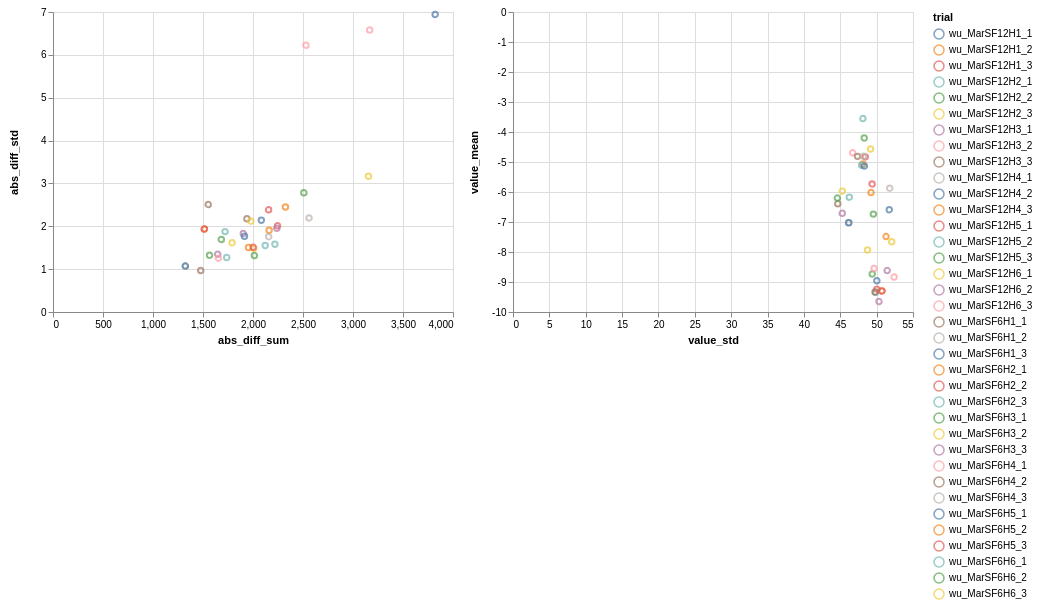

In [7]:
brush = alt.selection(type="interval", resolve="global")

base = (
    alt.Chart(scalar)
    .mark_point()
    .encode(
        tooltip="trial", color=alt.condition(brush, "trial", alt.value("lightgray"))
    )
).add_selection(brush)

base.encode(x="abs_diff_sum", y="abs_diff_std") | base.encode(x="value_std", y="value_mean")